<a href="https://colab.research.google.com/github/pvanand07/Retail-Sales-Prediction-Regression/blob/master/1_1_RS_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Import Dataset

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def Load_Dataset():
  df = pd.read_csv('/content/drive/MyDrive/Almabetter/Almabetter Projects/Data & Resources/Rossmann Stores Data.csv')
  df2 = pd.read_csv('/content/drive/MyDrive/Almabetter/Almabetter Projects/Data & Resources/store.csv')
  return df,df2
def merge_data(df,df2):
  df.set_index('Store', inplace=True)
  df2.set_index('Store', inplace=True)
  df_m = df.join(df2, on='Store')
  return df_m
df,df2 = Load_Dataset()
df_m = merge_data(df,df2)

### 2. Data Cleaning

In [ ]:
# Selecting only the rows with Open = 1
df_m2 = df_m[df_m['Open'] == 1].drop('Open', axis=1).copy()

# Converting Date to Datetime for analysis and feature engineering
df_m2['Date'] = pd.to_datetime(df_m2['Date'])

# We can also convert object Dtype to category for reduced memory usage
for col in df_m2.select_dtypes('object').columns:
  df_m2[col] = df_m2[col].astype('category')

# Replace all variations of "0" with a single representation
df_m2['StateHoliday'] = df_m2['StateHoliday'].replace(['0', 0], '0')

### 3. Data Preprocessing

In [139]:
# Data pre-processing
def cap_outliers(df):
    # Create a copy of the DataFrame to avoid modifying the original data
    cleaned_df = df.copy()

    # Iterate over numerical columns
    for column in cleaned_df.select_dtypes(include=np.number):
        # Calculate the 99th percentile value
        cap_value = cleaned_df[column].quantile(0.95)

        # Cap outliers to the 99th percentile value
        cleaned_df[column] = np.where(cleaned_df[column] > cap_value, cap_value, cleaned_df[column])

    return cleaned_df

def pre_processing2(df_m):

  target_col = 'Sales'
  df_c = df_m.drop_duplicates().copy()
  df_c = df_c.dropna()#.sample(n = 5000, random_state = 42)
  #df_c = df_c.sample(n = 5000, random_state = 42)

  # Generate  week_number, month and year columns from datetime
  df_c['week_number'] = (df_c['Date']).dt.week
  df_c['month'] = (df_c['Date']).dt.month
  df_c['year'] = (df_c['Date']).dt.year
  df_c.drop(['Date'], axis=1, inplace=True)#,'Customers'

  df_c = cap_outliers(df_c)


  # Separate features and target
  X = df_c.drop(target_col, axis=1)
  y = df_c[target_col]

  # Perform one-hot encoding for categorical features
  categorical_features = X.select_dtypes(include='category').columns.tolist()
  X_encoded = pd.get_dummies(X, columns=categorical_features)

  # Split the dataset into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
  return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = pre_processing2(df_m2)
X_train.describe()

,DayOfWeek,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,week_number,...,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
count,214249.000000,214249.000000,214249.000000,214249.000000,214249.000000,214249.000000,214249.0,214249.000000,214249.000000,214249.000000,...,214249.000000,214249.0,214249.000000,214249.000000,214249.000000,214249.0,214249.000000,214249.000000,214249.000000,214249.000000
mean,3.512427,0.446593,0.190344,4150.383106,7.186923,2008.164477,1.0,21.850720,2011.834426,23.168393,...,0.548535,0.0,0.131081,0.320384,0.581440,0.0,0.418560,0.218391,0.608442,0.173168
std,1.712859,0.497141,0.392573,4835.794125,3.248996,7.423311,0.0,13.130029,1.635053,14.159745,...,0.497640,0.0,0.337490,0.466625,0.493324,0.0,0.493324,0.413155,0.488100,0.378393
min,1.000000,0.000000,0.000000,40.000000,1.000000,1900.000000,1.0,1.000000,2009.000000,1.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,600.000000,4.000000,2005.000000,1.0,13.000000,2011.000000,11.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,2230.000000,7.000000,2009.000000,1.0,18.000000,2012.000000,22.000000,...,1.000000,0.0,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,0.000000,5630.000000,10.000000,2012.000000,1.0,37.000000,2013.000000,34.000000,...,1.000000,0.0,0.000000,1.000000,1.000000,0.0,1.000000,0.000000,1.000000,0.000000
max,6.000000,1.000000,1.000000,17110.000000,12.000000,2014.000000,1.0,40.000000,2014.000000,49.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


### Model 1: Statsmodel (Linear Regression)

In [140]:
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Assuming `pre_processing2` returns X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = pre_processing2((df_m2).drop(['Promo2','Promo2SinceYear'], axis=1))

# Create the scaler and fit/transform X_train and X_test
#scaler = StandardScaler()

scaler = MinMaxScaler()
X_train_s = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_s = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

# Apply square root transformation to y_train and y_test
y_train_s = np.sqrt(y_train)
y_test_s = np.sqrt(y_test)

stats = {}

# Perform regression analysis
X = X_train_s
y = y_train_s
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

# Extract regression results
stats['Regression Results'] = results.summary().tables[1]
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                 5.480e+04
Date:                Fri, 09 Jun 2023   Prob (F-statistic):               0.00
Time:                        13:32:38   Log-Likelihood:            -6.9430e+05
No. Observations:              214249   AIC:                         1.389e+06
Df Residuals:                  214229   BIC:                         1.389e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            7.05e+11   1.35e+12      0.521      0.602   -1.95e+12    3.36e+12
DayOfWeek                         -0.3414      0.041     -8.277      0.000      -0.422      -0.261
Customers                         61.6700      0.073    846.788      0.000      61.527      61.813
Promo                              6.6487      0.029    228.288      0.000       6.592       6.706
SchoolHoliday                      0.2701      0.035      7.743      0.000       0.202       0.339
CompetitionDistance                6.4203      0.049    130.059      0.000       6.324       6.517
CompetitionOpenSinceMonth         -0.3789      0.046     -8.209      0.000      -0.469      -0.288
CompetitionOpenSinceYear          -0.8157      0.207     -3.945      0.000      -1.221      -0.410
Promo2SinceWeek                    3.8694      0.040     95.597      0.000       3.790       3.949
week_number                       -1.2887      0.167     -7.707      0.000      -1.616      -0.961
month                              2.8980      0.166     17.494      0.000       2.573       3.223
year                               2.0327      0.035     57.477      0.000       1.963       2.102
StateHoliday_0                 -8.188e+11   1.57e+12     -0.521      0.602    -3.9e+12    2.26e+12
StateHoliday_a                 -8.188e+11   1.57e+12     -0.521      0.602    -3.9e+12    2.26e+12
StateHoliday_b                 -8.188e+11   1.57e+12     -0.521      0.602    -3.9e+12    2.26e+12
StateHoliday_c                 -8.188e+11   1.57e+12     -0.521      0.602    -3.9e+12    2.26e+12
StoreType_a                     1.583e+11   3.04e+11      0.521      0.602   -4.37e+11    7.54e+11
StoreType_b                     2.662e+09   5.11e+09      0.521      0.602   -7.35e+09    1.27e+10
StoreType_c                     1.583e+11   3.04e+11      0.521      0.602   -4.37e+11    7.54e+11
StoreType_d                     1.583e+11   3.04e+11      0.521      0.602   -4.37e+11    7.54e+11
Assortment_a                    1.907e+11   3.66e+11      0.521      0.602   -5.27e+11    9.08e+11
Assortment_b                            0          0        nan        nan           0           0
Assortment_c                    1.907e+11   3.66e+11      0.521      0.602   -5.27e+11    9.08e+11
PromoInterval_Feb,May,Aug,Nov  -2.351e+11   4.51e+11     -0.521      0.602   -1.12e+12    6.49e+11
PromoInterval_Jan,Apr,Jul,Oct  -2.351e+11   4.51e+11     -0.521      0.602   -1.12e+12    6.49e+11
PromoInterval_Mar,Jun,Sept,Dec -2.351e+11   4.51e+11     -0.521      0.602   -1.12e+12    6.49e+11
==============================================================================
Omnibus:                     1873.386   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (J

Insights (Non-Verified):

R-squared and Adjusted R-squared: The R-squared value of 0.258 indicates that the model explains 25.8% of the variance in the dependent variable (Sales). The Adjusted R-squared value is the same, suggesting that the addition of independent variables did not significantly improve the model's fit.

F-statistic and Prob (F-statistic): The F-statistic of 3928.0 and a p-value of 0.00 indicate that there is a statistically significant relationship between the independent variables as a whole and the dependent variable.

Coefficients: The coefficients for each independent variable provide information about the direction and magnitude of their impact on the dependent variable. A positive coefficient suggests a positive relationship, while a negative coefficient suggests a negative relationship.

Significance of coefficients: The t-value, P>|t|, and the confidence interval [0.025, 0.975] help determine the statistical significance of each coefficient. A smaller p-value indicates a stronger statistical significance. If the p-value is less than the chosen significance level (e.g., 0.05), you can reject the null hypothesis and conclude that the coefficient is statistically significant.

Important variables: Based on the coefficient values, variables with significant coefficients (p-value less than 0.05) can be considered important in predicting sales. In this case, variables like Promo, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, week_number, month, and year appear to be significant predictors.

Assumptions: Assessing the model's assumptions is essential. Some assumptions to check include linearity, normality of residuals, homoscedasticity (constant variance), and absence of multicollinearity among independent variables.

Omnibus: The Omnibus test is a combined statistical test for skewness and kurtosis of the residuals. The value of 549.481 suggests that the residuals are not normally distributed, indicating a departure from the assumption of normality.

Prob(Omnibus): The Prob(Omnibus) value of 0.000 indicates that the null hypothesis of normal distribution of residuals is rejected. This further supports the observation that the residuals do not follow a normal distribution.

Jarque-Bera (JB): The Jarque-Bera test is another test of normality for the residuals, focusing on skewness and kurtosis. The JB value of 553.645 is used to test the null hypothesis of normality. Similar to the Omnibus test, a significant JB statistic suggests non-normality.

Prob(JB): The Prob(JB) value of 5.99e-121 indicates that the null hypothesis of normality is rejected, providing further evidence that the residuals are not normally distributed.

Skew: Skewness measures the asymmetry of the residual distribution. A value of 0.124 suggests a slight positive skew, indicating a longer right tail in the distribution of residuals.

Kurtosis: Kurtosis measures the degree of peakedness or flatness of the residual distribution. A kurtosis value of 2.985 suggests a moderate degree of peakedness compared to a normal distribution.

Durbin-Watson: The Durbin-Watson statistic tests for autocorrelation in the residuals. The value of 2.004 is close to 2, indicating that there is little to no autocorrelation present in the residuals. A value between 1.5 and 2.5 generally suggests no significant autocorrelation.

Cond. No.: The condition number assesses multicollinearity among the independent variables. A higher value indicates a stronger correlation between the independent variables. In this case, the value of 2.22e+16 suggests potential multicollinearity concerns.


Based on the OLS regression results, we can generate the following insights:

- The R-squared value is 0.258, which means that the model explains 25.8% of the variance in sales. This indicates that there is still a significant amount of unexplained variance, and other factors not included in the model may be influencing sales.
The most significant positive impact on sales comes from running a promotion (Promo), with a coefficient of 13.1032. This suggests that running a promotion can increase sales by an average of 13.1 units.

- The day of the week (DayOfWeek) has a negative impact on sales, with a coefficient of -3.0158. This indicates that sales tend to decrease as the week progresses.

- School holidays (SchoolHoliday) have a positive impact on sales, with a coefficient of 0.5611. This suggests that sales increase by an average of 0.56 units during school holidays.

- The presence of competition (CompetitionDistance) has a positive impact on sales, with a coefficient of 0.5193. This could indicate that stores located near competitors may experience higher sales due to increased foot traffic or other factors.
The longer a competitor has been open (CompetitionOpenSinceMonth and CompetitionOpenSinceYear), the more negative the impact on sales, with coefficients of -2.9449 and -3.9209, respectively. This suggests that well-established competitors may have a stronger negative effect on sales.

- The Promo2 variable, which indicates whether a store is participating in a continuous and consecutive promotion, has a positive but not statistically significant impact on sales, with a coefficient of 3.46e+09.

- The month of the year has a positive impact on sales, with a coefficient of 6.4807. This suggests that sales tend to increase as the year progresses, possibly due to seasonal factors.
Store type and assortment type have mixed effects on sales, with some types having positive impacts and others having negative or non-significant impacts.


### Stats Model Results

In [155]:
results.summary().tables[0]

Dep. Variable:,Sales,R-squared:,0.829
Model:,OLS,Adj. R-squared:,0.829
Method:,Least Squares,F-statistic:,5.480e+04
Date:,"Fri, 09 Jun 2023",Prob (F-statistic):,0.00
Time:,13:41:25,Log-Likelihood:,-6.9430e+05
No. Observations:,214249,AIC:,1.389e+06
Df Residuals:,214229,BIC:,1.389e+06
Df Model:,19,,
Covariance Type:,nonrobust,,


### Model 2: Linear Regression(sklearn)

In [152]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


X_train, X_test, y_train, y_test = pre_processing2((df_m2).drop(['Promo2','Promo2SinceYear','CompetitionOpenSinceYear'], axis=1))
scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
y_train_s = np.sqrt(y_train)
y_test_s = np.sqrt(y_test)


regressor = LinearRegression()
regressor.fit(X_train_s, y_train_s)

y_pred = regressor.predict(X_test_s)
R2_score = regressor.score(X_test_s, y_test_s)
print(R2_score)

0.8297188052541075


In [150]:
regressor.coef_

array([-3.41645857e-01,  6.16752762e+01,  6.64823678e+00,  2.70045765e-01,
        6.42927969e+00, -3.69731166e-01,  3.88078938e+00, -1.28889385e+00,
        2.89826559e+00,  2.03244968e+00,  7.11139803e+00,  2.05999933e+00,
       -7.05691483e+00, -2.11448254e+00, -1.92221434e+00, -3.99680289e-15,
       -2.91911807e+00,  4.84133241e+00, -1.33609948e+00,  0.00000000e+00,
        1.33609948e+00, -1.87668867e-01,  6.07614250e-01, -4.19945383e-01])

In [154]:
pd.DataFrame(regressor.coef_, X_train.columns, columns=['Coefficient']).sort_values('Coefficient', ascending=False)

,Coefficient
Customers,6.167528e+01
StateHoliday_0,7.111398e+00
Promo,6.648237e+00
CompetitionDistance,6.429280e+00
StoreType_d,4.841332e+00
Promo2SinceWeek,3.880789e+00
month,2.898266e+00
StateHoliday_a,2.059999e+00
year,2.032450e+00
Assortment_c,1.336099e+00


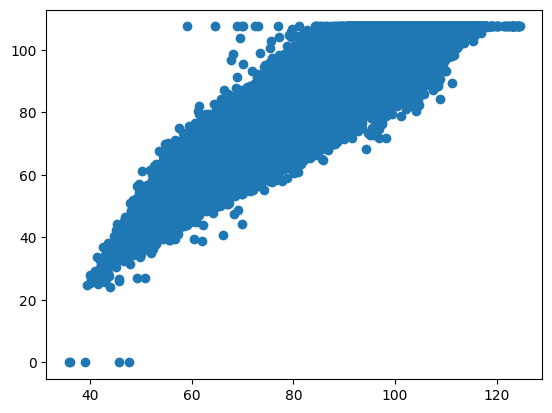

In [148]:
plt.scatter(y_pred,y_test)

Text(0, 0.5, 'residuals')

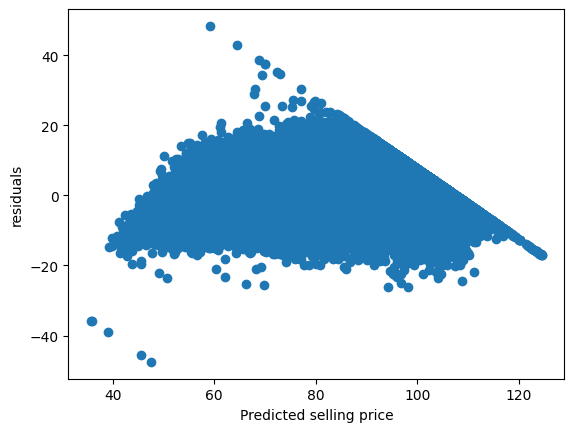

In [149]:
### Heteroscadacity
plt.scatter((y_pred),(y_test)-(y_pred))
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

# 3. Feature Selection and Engineering

In [144]:
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

def calculate_vif(df):
    # Select numerical columns
    numerical_columns = df.select_dtypes(include=['float64', 'int64'])
    
    # Replace infinite values with NaN
    numerical_columns.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    # Drop rows with NaN values
    numerical_columns.dropna(inplace=True)
    
    # Remove duplicates
    numerical_columns = numerical_columns.loc[:,~numerical_columns.columns.duplicated()]
    
    # Create a DataFrame to store VIF results
    vif_data = pd.DataFrame()
    vif_data['Variable'] = numerical_columns.columns
    vif_data['VIF'] = [vif(numerical_columns.values, i) for i in range(numerical_columns.shape[1])]
    
    return vif_data.sort_values(by='VIF', ascending=False)

calculate_vif(df_m2.drop(['Sales'], axis=1))

,Variable,VIF
7,Promo2,1.573677e+06
2,Promo,1.153423e+00
1,Customers,1.119583e+00
0,DayOfWeek,1.117165e+00
4,CompetitionDistance,1.059632e+00
9,Promo2SinceYear,1.037353e+00
3,SchoolHoliday,1.020993e+00
8,Promo2SinceWeek,1.019017e+00
6,CompetitionOpenSinceYear,1.010080e+00
5,CompetitionOpenSinceMonth,1.009137e+00


In [146]:
calculate_vif((df_m2).drop(['Promo2','Promo2SinceYear','Sales','CompetitionOpenSinceYear'], axis=1))

,Variable,VIF
1,Customers,5.140540
5,CompetitionOpenSinceMonth,4.461682
0,DayOfWeek,4.066374
6,Promo2SinceWeek,3.218630
2,Promo,2.017833
4,CompetitionDistance,1.600253
3,SchoolHoliday,1.230049
